In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from functools import partial

import os

# Mine
from wilson_cowan_2d.simulations import concrete_wc_kernel as wck
from wilson_cowan_2d.simulations import wc_params as wcp
from wilson_cowan_2d.simulations.nonlinear_functions import decreasing_exponential
from wilson_cowan_2d.analysis.nulclines import calc_cross_points, calc_nulclines_crosspoints

%load_ext autoreload
%autoreload 2

In [2]:
report_path = "/home/nicolasjudd/school_notes/neural/final_report/"
img_path = os.path.join(report_path, 'img')

In [69]:
τe = 1
τi = 4.5 * τe
σe = 1
σi = 0.9 * σe  # Doesn't do anything here

param = wcp.SSNDefaultParams(τ = np.array([τe, τi]), n=3, k=0.5, size = 2**6, σ=np.array([σe,σi]))
# param.Θ = np.array([0.08, 0.4])

# u,v,cps = calc_nulclines_crosspoints(param, interp_prec=1e-5,
#                                      fit_points=1_000,t_rang=(-100, 100))
# _ = plt.plot(*u)
# _ = plt.plot(*v)
# _ = plt.scatter(*cps, c='r')
# # _ = plt.xlim(0, 2)
# # _ = plt.ylim(0, 2)
# print(cps)

# u_str = cps[0,1]
# v_str = cps[1,1]

u_str = 0
v_str = 0

u = u_str*np.ones(param.size).reshape((param.size,1))
v = v_str*np.ones(param.size).reshape((param.size, 1))

ii = 0  #  param.size - 128
u[ii:ii+2**1] = 1
# v[0:2**1] = 1

#  inp = (u3, v3, u3, 0)

inp = (u, v)

The solver successfully reached the end of the integration interval.


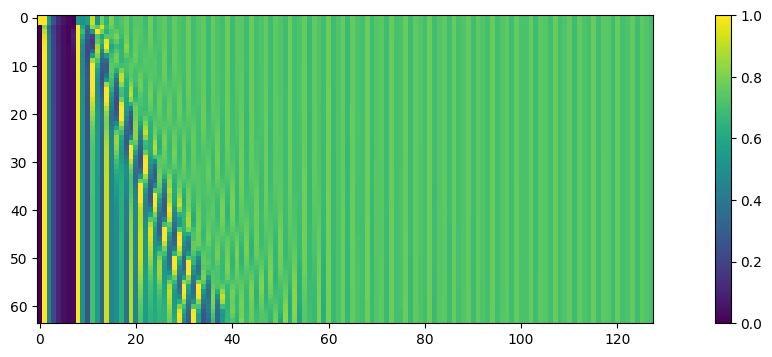

In [70]:
trv_wav = wck.WCDecExpTravelLocal1D(inp, param)

end = 100
step = end/(param.size*2)
res = trv_wav((0, end), t_eval=np.arange(0, end, step))

print(res._solved.message)


fig = plt.figure(figsize=(16,4))
im = plt.imshow(res.u.T, vmin=0, vmax=1)
plt.colorbar(im)


The solver successfully reached the end of the integration interval.


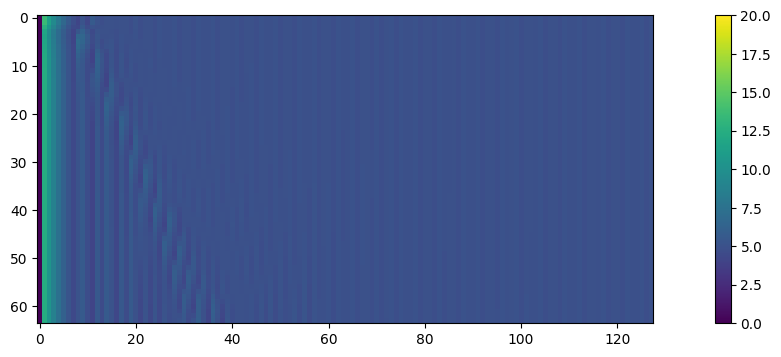

In [71]:
trv_wav = wck.WCDecExpTravelLocal1D(inp, param)

end = 100
step = end/(param.size*2)
res = trv_wav((0, end), t_eval=np.arange(0, end, step))

print(res._solved.message)


fig = plt.figure(figsize=(16,4))
im = plt.imshow(res.v.T, vmin=0, vmax=20)
plt.colorbar(im)


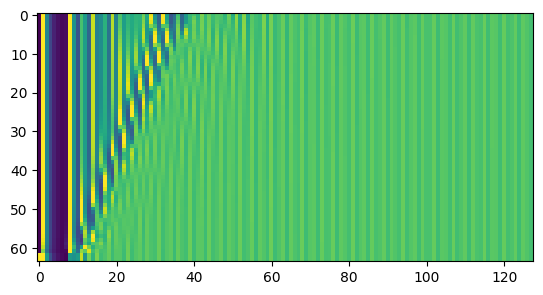

In [72]:
# fig = plt.figure(figsize=(10,20))
plt.imshow(np.flip(res.u.T[:,:512], axis=0), aspect='equal', vmin=0, vmax=1)# plt.colorbar()


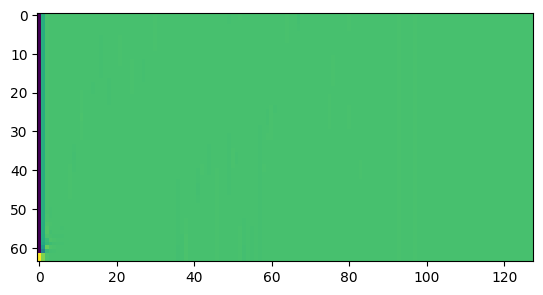

In [9]:
# fig = plt.figure(figsize=(10,20))
plt.imshow(np.flip(res.u.T[:,:512], axis=0), aspect='equal', vmin=0, vmax=1)# plt.colorbar()


In [71]:
res.v

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [11.70878224, 11.70878224, 11.70878158, ..., 11.70877128,
        11.70877128, 11.70877128],
       [14.32626693, 14.32626693, 14.32626625, ..., 14.32625657,
        14.32625657, 14.32625657],
       ...,
       [ 5.04356728,  5.04356728,  5.0439962 , ...,  5.39676109,
         5.39677978,  5.39678912],
       [ 5.01255549,  5.01255549,  5.01298177, ...,  5.36357759,
         5.36359616,  5.36360545],
       [ 4.98173438,  4.98173438,  4.98215804, ...,  5.33059812,
         5.33061658,  5.33062581]])